In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Train_Data.csv')

In [5]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [6]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [8]:
df.campaign.value_counts()

campaign 1    4571
Name: campaign, dtype: int64

In [9]:
df.adgroup.value_counts()

adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64

In [10]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.adgroup = le.fit_transform(df.adgroup)
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,0,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,1,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,2,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,3,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,0,ad 2,247,126,1.29,4,925.71


In [12]:
%config IPCompleter.greedy=True

In [13]:
df['ad'].value_counts()

ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 24      4
ad 36      4
ad 39      4
ad 31      4
ad 51      3
Name: ad, Length: 70, dtype: int64

In [14]:
df.campaign = le.fit_transform(df.campaign)
df.ad = le.fit_transform(df.ad)
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,0,0,0,24,6,0.08,0,0.00
1,01-08-2020,0,1,0,1,0,0.00,0,0.00
2,01-08-2020,0,2,0,13,4,0.04,0,0.00
3,01-08-2020,0,3,0,5,4,0.08,0,0.00
4,01-08-2020,0,0,11,247,126,1.29,4,925.71


In [15]:
df.corr()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adgroup,NaN,1.000000,0.036228,-0.196881,-0.151725,-0.080354,-0.101866,-0.080923
ad,NaN,0.036228,1.000000,-0.009908,-0.002035,-0.010887,-0.009507,-0.019585
impressions,NaN,-0.196881,-0.009908,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,NaN,-0.151725,-0.002035,0.987514,1.000000,0.719925,0.856941,0.798282
cost,NaN,-0.080354,-0.010887,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,NaN,-0.101866,-0.009507,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,NaN,-0.080923,-0.019585,0.759671,0.798282,0.581662,0.964096,1.000000


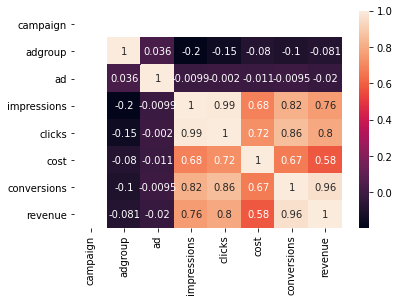

In [16]:
sns.heatmap(df.corr(),annot=True)

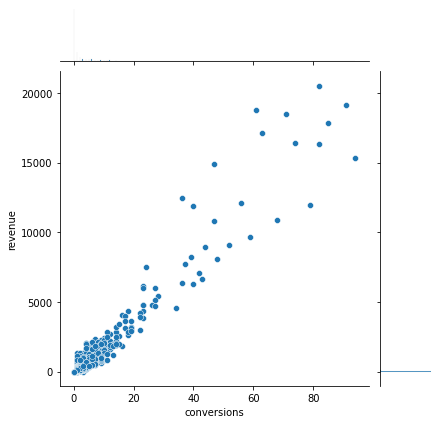

In [17]:
sns.jointplot(x='conversions', y='revenue', data = df)

In [18]:
df.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue'],
      dtype='object')

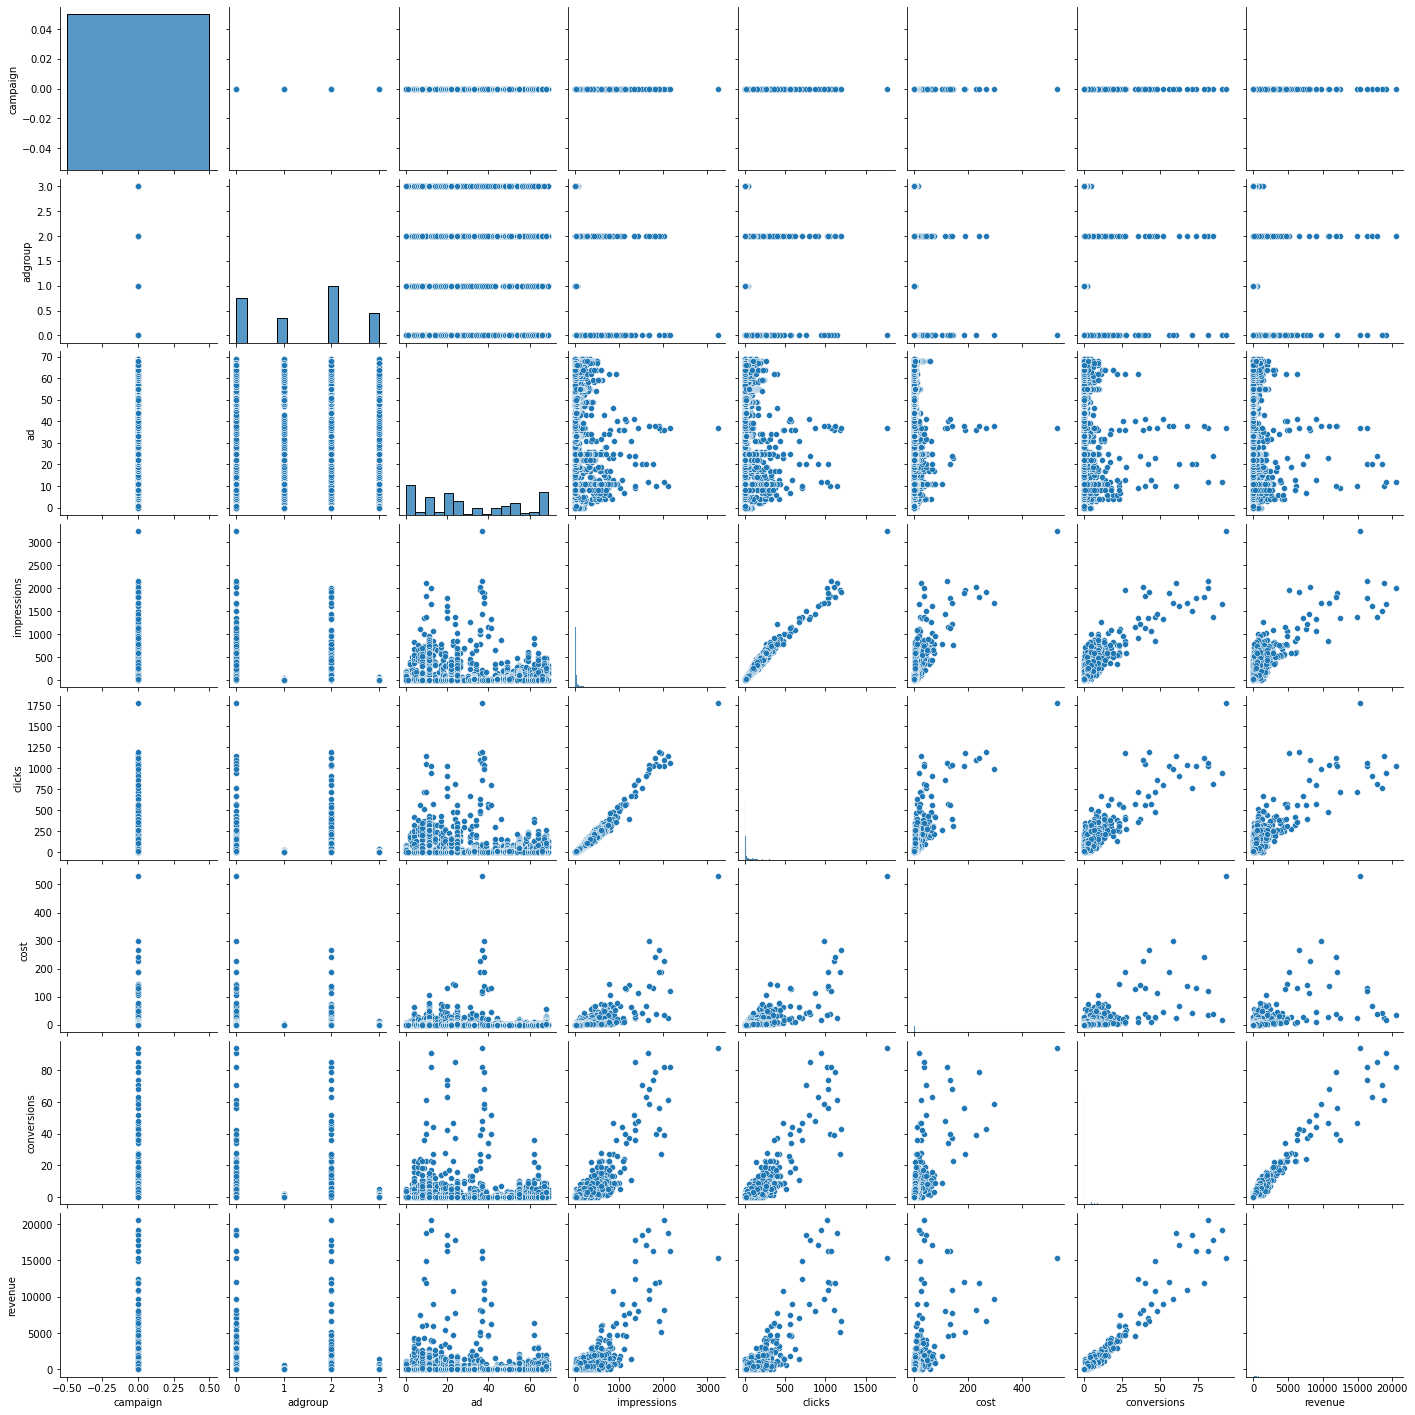

In [19]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


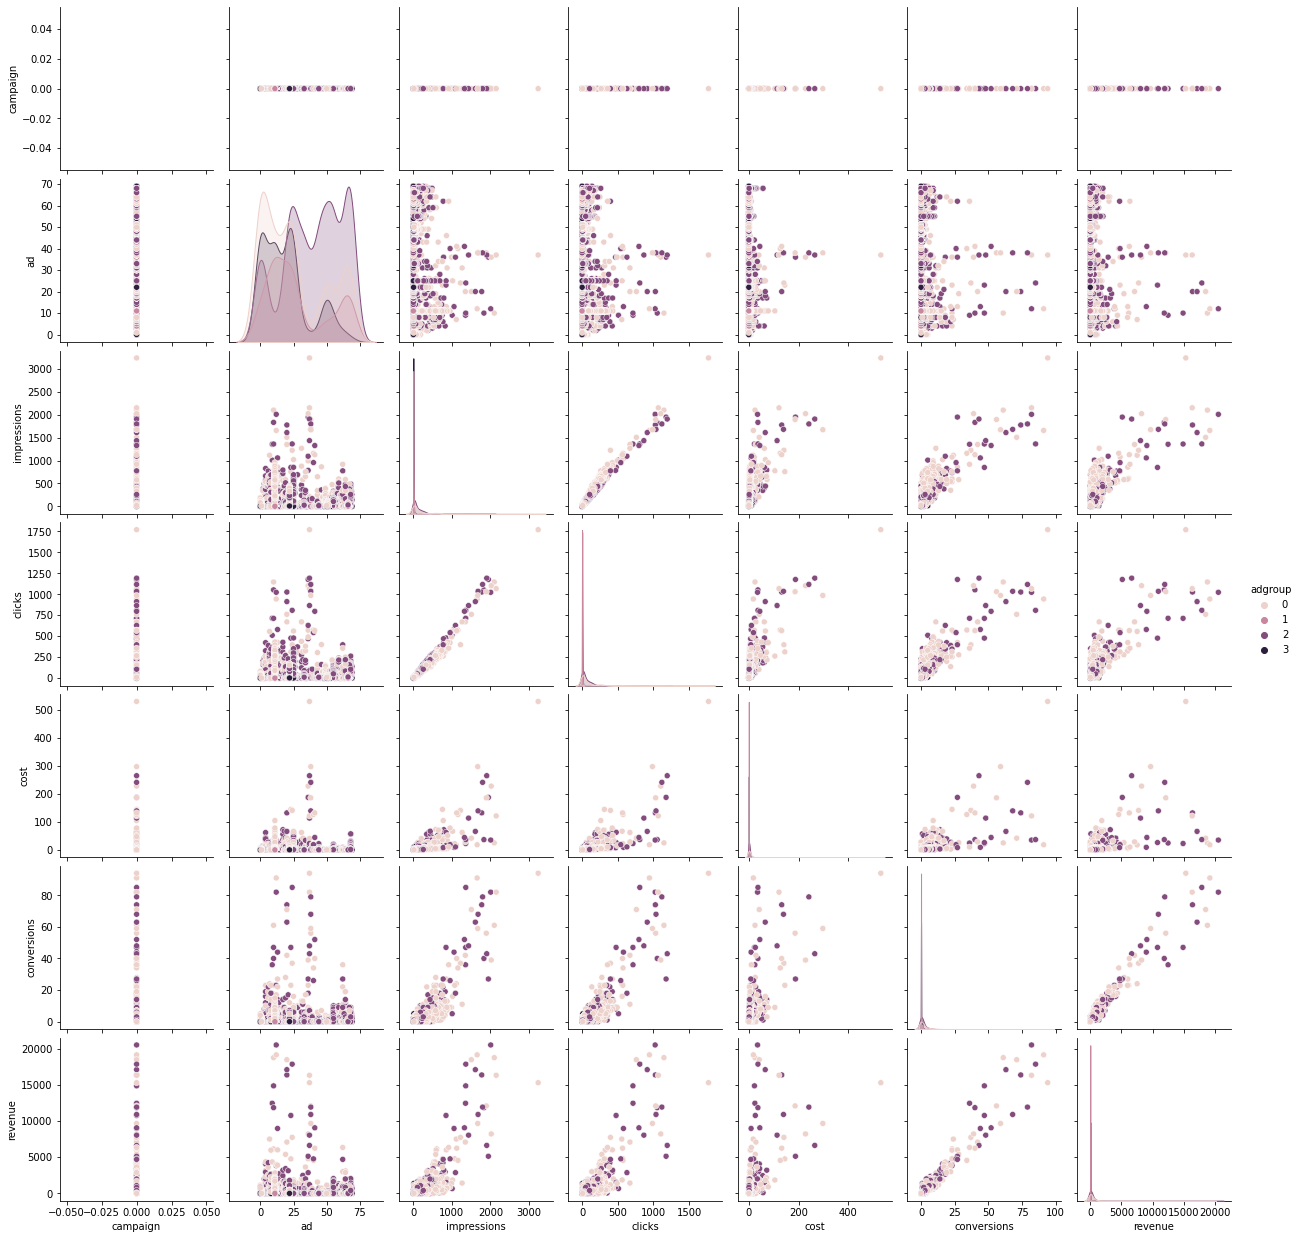

In [20]:
sns.pairplot(df, hue='adgroup')

In [21]:
df['adgroup'].value_counts()

2    1672
0    1314
3     858
1     727
Name: adgroup, dtype: int64

In [22]:
#df['date']=df['date'].replace("-","")
df['date'] = df['date'].replace('-', '',regex=True).astype(int)
df['date']
#df['date'] = df['date'].dt.strftime("%d%m%Y").astype(int)

0        1082020
1        1082020
2        1082020
3        1082020
4        1082020
          ...   
4566    28022021
4567    28022021
4568    28022021
4569    28022021
4570    28022021
Name: date, Length: 4571, dtype: int64

In [23]:
x=df.drop('revenue',axis=1)
y=df['revenue']

In [24]:
df['date'].head()

0    1082020
1    1082020
2    1082020
3    1082020
4    1082020
Name: date, dtype: int64

In [25]:
x.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions'],
      dtype='object')

In [26]:
y

0         0.00
1         0.00
2         0.00
3         0.00
4       925.71
         ...  
4566      0.00
4567      0.00
4568     93.20
4569      0.00
4570      0.00
Name: revenue, Length: 4571, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [28]:
#import models

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [30]:
from sklearn.model_selection import GridSearchCV 
params_rf = {
    'max_depth': [8,10, 30, 35, 50, 65, 75],
    'max_features': [1,2,3,4,5,6,7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 5, n_jobs = -1)
rf_regressor.fit(x_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 30
Optimal max_features: 7
Optimal min_sample_leaf: 4
Optimal min_samples_split: 8
Optimal n_estimators: 50
Best score: -274.5337923682001


In [31]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [32]:

rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(x_train, y_train)
y_train_pred = rf_model.predict(x_train)
y_pred = rf_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9729230847544518
Test r2 score:  0.8998561575517456
Train RMSE: 178.2833
Test RMSE: 309.5526


7 features with reduction of 12.50%


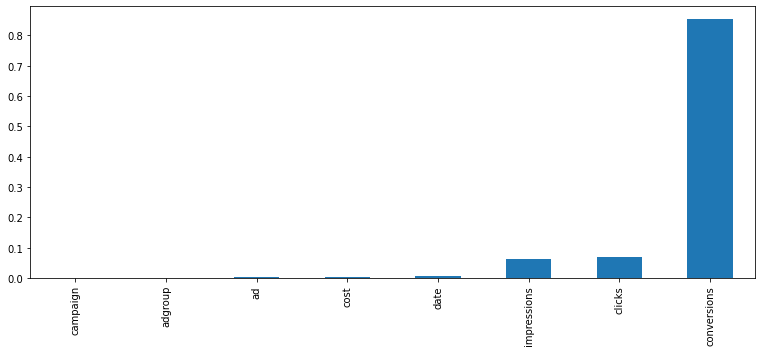

In [33]:
rf_feature_importance = pd.Series(index = x_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5))

In [34]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(x_train, y_train)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: sag
Best score: -261.40157638987915


In [35]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(x_train, y_train)
y_train_pred = ridge_model.predict(x_train)
y_pred = ridge_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9446126422497009
Test r2 score:  0.899129509115969
Train RMSE: 255.1823
Test RMSE: 310.6736


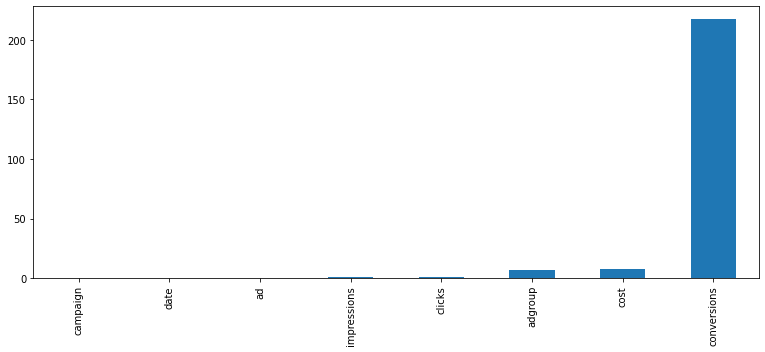

In [36]:
# Ridge Model Feature Importance
ridge_feature_coef = pd.Series(index = x_train.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [37]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(x_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: True
Best score: -261.09425448177427


In [38]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(x_train, y_train)
y_train_pred = lasso_model.predict(x_train)
y_pred = lasso_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9464717132514934
Test r2 score:  0.8994597531669807
Train RMSE: 253.8090
Test RMSE: 310.1646


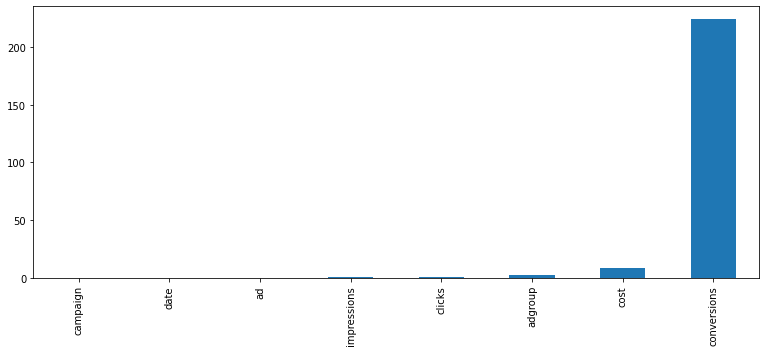

In [39]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = x_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [40]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

# Use ElasticNetCV to tune alpha automatically instead of redundantly using ElasticNet and GridSearchCV
el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(x_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')

Optimal alpha: 152820928.091732
Optimal l1_ratio: 0.100
Number of iterations 1


In [41]:
y_train_pred = el_model.predict(x_train)
y_pred = el_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.9297915294933775e+32
Test r2 score:  -0.0005996942109214309
Train RMSE: 1126.8470
Test RMSE: 978.4812


0 features with reduction of 100.00%


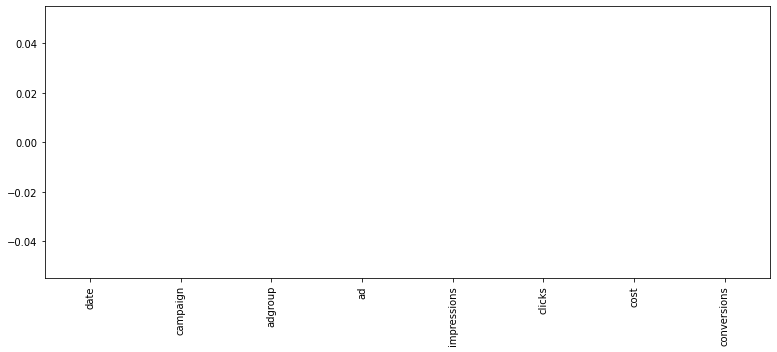

In [42]:
# ElasticNet Model Feature Importance
el_feature_coef = pd.Series(index = x_train.columns, data = np.abs(el_model.coef_))
n_features = (el_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(el_feature_coef))*100:2.2f}%')
el_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [43]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(x_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 3
Best score: -665.6634646480236


In [44]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(x_train, y_train)
y_train_pred = knn_model.predict(x_train)
y_pred = knn_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.8116470992642102
Test r2 score:  0.539729674754686
Train RMSE: 376.1166
Test RMSE: 663.6343


In [45]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(x_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal feature_fraction: 1
Optimal n_estimators: 100
Best score: -299.0019792677085


In [46]:
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt', 
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"], 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(x_train, y_train)
y_train_pred = lgb_model.predict(x_train)
y_pred = lgb_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.980685018766347
Test r2 score:  0.942982246622011
Train RMSE: 153.8546
Test RMSE: 233.5755


7 features with reduction of 12.50%


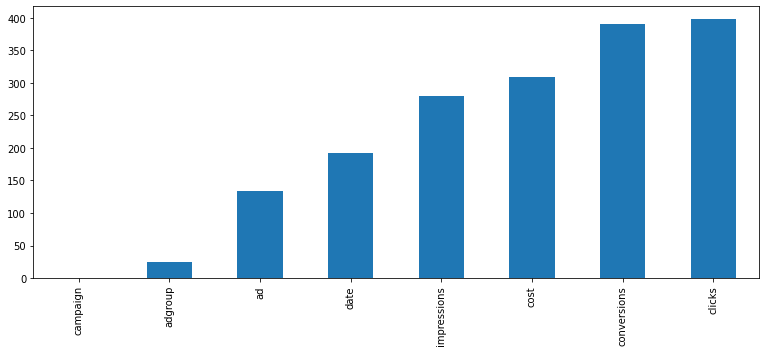

In [48]:
# LightGBM Feature Importance
lgb_feature_importance = pd.Series(index = x_train.columns, data = np.abs(lgb_model.feature_importances_))
n_features = (lgb_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(lgb_feature_importance))*100:2.2f}%')
lgb_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

In [49]:
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(x_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

[04:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal lr: 0.1
Optimal colsample_bytree: 0.5
Optimal n_estimators: 200
Best score: -253.85463981459253


In [50]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(x_train, y_train)
y_train_pred = xgb_model.predict(x_train)
y_pred = xgb_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

[04:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9929467755005333
Test r2 score:  0.9423189843443113
Train RMSE: 93.9786
Test RMSE: 234.9302


In [52]:
# XGB with early stopping
xgb_model.fit(x_train, y_train, early_stopping_rounds=4,
             eval_set=[(x_test, y_test)], verbose=False)
y_train_pred = xgb_model.predict(x_train)
y_pred = xgb_model.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9358361350456932
Test r2 score:  0.9343036186043358
Train RMSE: 241.2090
Test RMSE: 250.7223


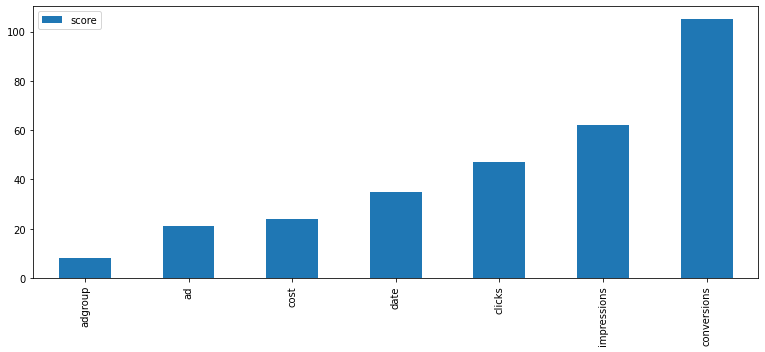

In [53]:
# XGB Feature Importance, relevant features can be selected based on its score
feature_important = xgb_model.get_booster().get_fscore()
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=True)
data.plot(kind='bar', figsize = (13,5))
plt.show()

Regressor ensembling models

In [54]:
rf_model_en = RandomForestRegressor(max_depth=200, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(x_train, y_train)
y_train_pred = rf_model_en.predict(x_train)
y_pred = rf_model_en.predict(x_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9717056615164872
Test r2 score:  0.9206497564629588
Train RMSE: 180.5945
Test RMSE: 275.5475


ridge -96.908 11.527
lasso -96.621 11.685
rf_en -77.728 13.849
stacking -86.617 12.053


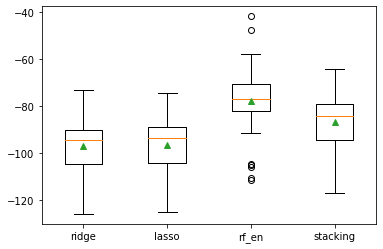

In [55]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('ridge', ridge_model))
    base_models.append(('lasso', lasso_model))
    base_models.append(('rf', rf_model_en))
    # define meta learner model
    learner = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['ridge'] = ridge_model
    models['lasso'] = lasso_model
    models['rf_en'] = rf_model_en
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=19)
    scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    results.append(scores)
    names.append(name)
    print(f'{name} {mean(scores):.3f} {std(scores):.3f}')
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [57]:
# define the base models
base_models = list()
base_models.append(('ridge', ridge_model))
base_models.append(('lasso', lasso_model))
base_models.append(('rf', rf_model_en))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack1 = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
# fit the model on all available data
stack1.fit(x, y)

StackingRegressor(cv=10,
                  estimators=[('ridge',
                               Ridge(alpha=0.01, copy_X=True,
                                     fit_intercept=True, max_iter=None,
                                     normalize=True, random_state=None,
                                     solver='sag', tol=0.001)),
                              ('lasso',
                               Lasso(alpha=0.01, copy_X=True,
                                     fit_intercept=True, max_iter=1000,
                                     normalize=True, positive=False,
                                     precompute=False, random_state=None,
                                     selection='cyclic', tol=0.0001,
                                     warm_start=False)),...
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_sp

In [59]:
# define the base models
base_model = list()
base_model.append(('rf1', rf_model))
base_model.append(('rf2', rf_model_en))
base_model.append(('rf3', RandomForestRegressor(max_depth=8, max_features=0.1, min_samples_leaf=3, 
                                                min_samples_split=2, n_estimators=250, n_jobs=-1, oob_score=False)))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack2 = StackingRegressor(estimators=base_model, final_estimator=learner, cv=10)
# fit the model on all available data
stack2.fit(x, y)

StackingRegressor(cv=10,
                  estimators=[('rf1',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features=7,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=8,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estima

In [60]:
submission = pd.DataFrame(columns=['Id','Prediction'])
submission['Id'] = test_df['Id']

ridge_pred = ridge_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(ridge_pred)
submission.to_csv('submission_ridge.csv',index=False)

lasso_pred = lasso_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(lasso_pred)
submission.to_csv('submission_lasso.csv',index=False)

elastic_pred = el_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(elastic_pred)
submission.to_csv('submission_elastic.csv',index=False)

knn_pred = knn_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(knn_pred)
submission.to_csv('submission_knn.csv',index=False)

rf_pred = rf_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(rf_pred)
submission.to_csv('submission_rf.csv',index=False)

lgb_pred = lgb_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(lgb_pred)
submission.to_csv('submission_lgb.csv',index=False)

xgb_pred = xgb_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(xgb_pred)
submission.to_csv('submission_xgb.csv',index=False)

stack_pred1 = stack1.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(stack_pred1)
submission.to_csv('submission_stack1.csv',index=False)

stack_pred2 = stack2.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(stack_pred2)
submission.to_csv('submission_stack2.csv',index=False)

NameError: ignored

In [62]:
new_test_data = pd.read_csv("Test_Data.csv" )
new_test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [63]:
new_test_data.adgroup = le.fit_transform(new_test_data.adgroup)
new_test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,0,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,2,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,3,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,1,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,1,ad 2,0.01,3,1,0


In [64]:
new_test_data.campaign = le.fit_transform(new_test_data.campaign)
new_test_data.ad = le.fit_transform(new_test_data.ad)
new_test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,0,0,0,0.58,121,49,1
1,01-03-2021,0,2,0,0.17,22,12,0
2,01-03-2021,0,3,0,0.05,5,3,0
3,01-03-2021,0,1,0,0.01,2,1,0
4,01-03-2021,0,1,2,0.01,3,1,0


In [65]:
new_test_data['date'] = new_test_data['date'].replace('-', '',regex=True).astype(int)
new_test_data['date'].head()

0    1032021
1    1032021
2    1032021
3    1032021
4    1032021
Name: date, dtype: int64

In [67]:
predictions = rf_model_en.predict(new_test_data)

In [70]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["revenue"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
pred = pd.read_csv("prediction.csv")
pred.drop('Unnamed: 0',inplace=True,axis=1)
pred.to_csv('prediction.csv')
files.download('prediction.csv')
pred.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,revenue
0,320.253198
1,30.931511
2,0.000000
3,0.000000
4,0.000000
